In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

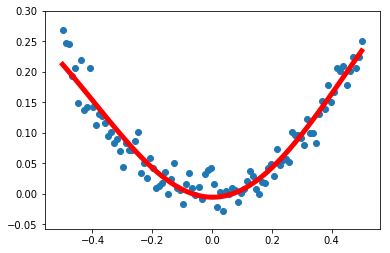

In [17]:
# 在 [-0.5, 0.5]区间内生成随机数
x_data = np.linspace(-0.5, 0.5, 100)[:, np.newaxis]
# 在 100个随机数基础上，增加噪音
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 神经网络 中间层
weight_L1 = tf.Variable(tf.random_normal([1, 10]))
biase_L1 = tf.Variable(tf.zeros([1, 10]))
w_plus_b_L1 = tf.matmul(x, weight_L1) + biase_L1
# 激活函数
L1 = tf.nn.tanh(w_plus_b_L1)

# 神经网络 输出层
wegith_L2 = tf.Variable(tf.random_normal([10, 1]))
biase_L2 = tf.Variable(tf.zeros([1, 1]))
w_plus_b_L2 = tf.matmul(L1, wegith_L2) + biase_L2
prediction = tf.nn.tanh(w_plus_b_L2)

# Loss Function
loss = tf.reduce_mean(tf.square(y - prediction))
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for _ in range(1500):
        sess.run(train, feed_dict = {x: x_data, y: y_data})

    # 使用训练好的模式进行预测
    prediction_result = sess.run(prediction, feed_dict = {x: x_data})
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_result, 'r-', lw = 5)
    plt.show()